In [233]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Loading Data
The results are saved in `./data/lap_times.csv`

In [234]:
# lap_dir = './data/lap_history/'
# print(f"# of lap_history files: {len(os.listdir(lap_dir))}")
# laps_data_filenames = os.listdir(lap_dir)
# laps_data_filenames.sort()

# tire_dir = './data/tire_strategy/'
# print(f"# of tire_strategy files: {len(os.listdir(tire_dir))}")
# tire_data_filenames = os.listdir(tire_dir)
# tire_data_filenames.sort()

# lap_times_data_list = []
# drivers = pd.read_csv('./data/drivers.csv').drop(columns=['DRIVER'])

# for lap_file_name, tire_file_name in list(zip(laps_data_filenames, tire_data_filenames))[1:]:

#     race_name = lap_file_name.split(sep = "_")[2] + lap_file_name.split(sep = "_")[0]
#     temp_lap_data = pd.read_csv(lap_dir + lap_file_name, header = None)
#     temp_lap_data.columns = ['NO', 'GAP', 'TIME']
#     temp_lap_data['RACE'] = race_name
#     temp_lap_data['TIRE'] = ""

#     tires = pd.read_csv(tire_dir + tire_file_name)
#     temp_tire_data = pd.merge(tires, drivers, how = 'left', on = 'NAME')
#     filter_col = [col for col in temp_tire_data if col.startswith('Stint')]

#     for driver_no in temp_tire_data['NO'].to_list():
#         stints = temp_tire_data[temp_tire_data['NO'] == driver_no][filter_col].dropna(axis = 1).values.tolist()[0]
#         tire_col = []
#         for info in stints:
#             try:
#                 tire, n_of_laps = info.split(" ")
#             except:
#                 tire = info
#                 n_of_laps = "1"
#             n_of_laps = int(''.join(c for c in n_of_laps if c.isdigit()))
#             tire_col = tire_col + list([tire, i] for i in range(n_of_laps))
#         my_len = len(tire_col)
#         df_len = len(temp_lap_data.loc[temp_lap_data['NO'] == driver_no])
#         if my_len > df_len:
#             tire_col = tire_col[:df_len]
#         else:
#             tire_col = tire_col + (["ERROR"] * (df_len - my_len))
#         # print(f"arr len: {len(tire_col)}")
#         # print(f"loc len: {len(temp_lap_data.loc[temp_lap_data['NO'] == driver_no])}")
#         temp_lap_data.loc[temp_lap_data['NO'] == driver_no, 'LAP'] = range(df_len)
#         if df_len > 0:
#             temp_lap_data.loc[temp_lap_data['NO'] == driver_no, ['TIRE', 'STINT_LAP']] = tire_col

#     lap_times_data_list.append(temp_lap_data)
#     print("{} done.".format(lap_file_name))

# lap_times = pd.concat(lap_times_data_list, ignore_index=True)
# lap_times.to_csv('./data/lap_times.csv', index = False)

In [235]:
lap_times = pd.read_csv('./data/lap_times.csv')

In [236]:
def string_to_seconds(s):
    mins, secs = s.split(":")
    return (float(mins) * 60) + float(secs)

lap_times['TIME'] = lap_times['TIME'].apply(string_to_seconds)

In [237]:
#lap_times = pd.read_csv('./data/lap_times.csv')
tracks = pd.read_csv('./data/track_history.csv')

In [238]:
print('Lap Times')
display(lap_times)
print('Track Features')
display(tracks)

Lap Times


NO       GAP     TIME         RACE    TIRE   LAP  STINT_LAP
0       5         0   92.868  hungary2015    Soft   0.0        0.0
1       7    1.332    94.200  hungary2015    Soft   0.0        0.0
2       6    3.110    95.978  hungary2015    Soft   0.0        0.0
3      77    4.414    97.282  hungary2015    Soft   0.0        0.0
4      26    5.615    98.483  hungary2015    Soft   0.0        0.0
...    ..       ...      ...          ...     ...   ...        ...
23092  55   84.127   103.244    china2016  Medium  55.0       22.0
23093  77   86.192   105.811    china2016  Medium  55.0       25.0
23094  11   94.283   104.687    china2016  Medium  55.0       27.0
23095  14   97.253   103.523    china2016  Medium  55.0       23.0
23096  22  101.990   104.883    china2016   Super  55.0       11.0

[23097 rows x 7 columns]

Track Features


TRACK  YEAR  LENGTH  LAPS  DOWNFORCE  LATERAL  ASPHALT_ABR  \
0   Australia  2016    5.30    58          4        1            3   
1     Bahrain  2016    5.41    57          3        3            5   
2       China  2016    5.45    56          3        4            3   
3   Australia  2015    5.30    58          4        1            3   
4    Malaysia  2015    5.54    56          3        4            3   
5       China  2015    5.45    56          3        4            3   
6       Spain  2015    4.65    66          4        4            4   
7      Monaco  2015    3.34    78          5        1            1   
8      Canada  2015    4.36    70          2        1            1   
9     Austria  2015    4.33    71          4        3            1   
10    Britain  2015    5.89    52          4        5            3   
11    Hungary  2015    4.38    70          4        4            3   
12    Belgium  2015    7.00    44          2        4            3   
13      Italy  2015    5.79    53          1        2            3   
14  Singapore  2015    5.06    61          5        2            3   
15      Japan  2015    5.80    53          3        5            3   
16     Russia  2015    5.84    53          4        5            1   
17        USA  2015    5.51    56          3        4            3   
18     Mexico  2015    4.30    71          2        3            0   
19     Brazil  2015    4.30    71          4        4            3   
20   AbuDhabi  2015    5.55    55          3        3            2   
21    Bahrain  2015    5.41    57          3        3            5   

    ASPHALT_GRP  TIRE_STRESS  AIR_TEMP_MAX  AIR_TEMP_MIN  T_TEMP_MAX  \
0             1            1          24.7          22.2        38.4   
1             4            3          22.6          21.2        29.6   
2             3            4          21.9          20.3        37.3   
3             1            1          21.0          17.0        38.0   
4             3            4          35.4          32.7        61.4   
5             3            4          22.2          20.5        46.6   
6             4            4          28.3          25.3        51.9   
7             1            1          19.4          18.0        40.1   
8             1            2          22.0          20.2        42.3   
9             2            2          16.0          14.0        35.6   
10            4            5          20.6          17.3        38.9   
11            4            3          24.9          22.0        49.2   
12            4            5          23.0          22.0        37.0   
13            2            5          23.0          22.0        39.0   
14            1            2          30.3          28.7        37.4   
15            4            5          28.6          27.2        42.4   
16            4            2          18.8          17.9        28.0   
17            2            3          17.8          17.2        19.4   
18            4            0          25.2          22.1        56.5   
19            3            3          25.8          22.1        47.3   
20            2            2          27.0          25.1        29.3   
21            4            3          26.2          24.1        31.0   

    T_TEMP_MIN  
0         26.8  
1         25.9  
2         45.3  
3         29.0  
4         53.0  
5         40.3  
6         45.6  
7         31.5  
8         37.6  
9         27.1  
10        23.9  
11        40.7  
12        33.0  
13        38.0  
14        33.5  
15        35.3  
16        25.6  
17        17.8  
18        42.3  
19        38.2  
20        27.5  
21        28.8

# Merging Tables

In [239]:
tracks['TRACK'] = tracks['TRACK'].apply(lambda x: x.lower())
tracks['RACE'] = tracks['TRACK'] + tracks['YEAR'].astype(str)
df = pd.merge(lap_times, tracks, 'left', ['RACE'])

In [240]:
df

NO       GAP     TIME         RACE    TIRE   LAP  STINT_LAP    TRACK  \
0       5         0   92.868  hungary2015    Soft   0.0        0.0  hungary   
1       7    1.332    94.200  hungary2015    Soft   0.0        0.0  hungary   
2       6    3.110    95.978  hungary2015    Soft   0.0        0.0  hungary   
3      77    4.414    97.282  hungary2015    Soft   0.0        0.0  hungary   
4      26    5.615    98.483  hungary2015    Soft   0.0        0.0  hungary   
...    ..       ...      ...          ...     ...   ...        ...      ...   
23092  55   84.127   103.244    china2016  Medium  55.0       22.0    china   
23093  77   86.192   105.811    china2016  Medium  55.0       25.0    china   
23094  11   94.283   104.687    china2016  Medium  55.0       27.0    china   
23095  14   97.253   103.523    china2016  Medium  55.0       23.0    china   
23096  22  101.990   104.883    china2016   Super  55.0       11.0    china   

       YEAR  LENGTH  LAPS  DOWNFORCE  LATERAL  ASPHALT_ABR  ASPHALT_GRP  \
0      2015    4.38    70          4        4            3            4   
1      2015    4.38    70          4        4            3            4   
2      2015    4.38    70          4        4            3            4   
3      2015    4.38    70          4        4            3            4   
4      2015    4.38    70          4        4            3            4   
...     ...     ...   ...        ...      ...          ...          ...   
23092  2016    5.45    56          3        4            3            3   
23093  2016    5.45    56          3        4            3            3   
23094  2016    5.45    56          3        4            3            3   
23095  2016    5.45    56          3        4            3            3   
23096  2016    5.45    56          3        4            3            3   

       TIRE_STRESS  AIR_TEMP_MAX  AIR_TEMP_MIN  T_TEMP_MAX  T_TEMP_MIN  
0                3          24.9          22.0        49.2        40.7  
1                3          24.9          22.0        49.2        40.7  
2                3          24.9          22.0        49.2        40.7  
3                3          24.9          22.0        49.2        40.7  
4                3          24.9          22.0        49.2        40.7  
...            ...           ...           ...         ...         ...  
23092            4          21.9          20.3        37.3        45.3  
23093            4          21.9          20.3        37.3        45.3  
23094            4          21.9          20.3        37.3        45.3  
23095            4          21.9          20.3        37.3        45.3  
23096            4          21.9          20.3        37.3        45.3  

[23097 rows x 20 columns]

# Pre-processing

In [241]:
## INTUITION

print("Before: {}".format(df.shape))

## Engineered Data, 'PERCENT_COMPLETE' : Percentage of the race completed.

df['PERCENT_COMPLETE'] = df['LAP'] / df['LAPS']
df.drop(columns = ['LAP', 'LAPS'], inplace = True)

## Engineered Data, 'AVG_SPEED' : Average speed in the lap.

df['AVG_SPEED'] = (df['LENGTH'] / df['TIME']) * 3600

## Reduce the features.

df['AIR_TEMP_AVG'] = (df['AIR_TEMP_MAX'] + df['AIR_TEMP_MIN']) / 2
df['TRACK_TEMP_AVG'] = (df['T_TEMP_MAX'] + df['T_TEMP_MIN']) / 2
df.drop(columns = ['AIR_TEMP_MAX', 'AIR_TEMP_MIN', 'T_TEMP_MAX', 'T_TEMP_MIN'], inplace = True)

## Dropping irrelevant features.

df.drop(columns = ['NO', 'YEAR', 'TRACK'], inplace = True)

## Dropping laps where the driver was lapped.

def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True

df = df[df['GAP'].apply(lambda x: is_float(x))]
df['GAP'] = df['GAP'].astype(float)

## Removing laps on weather tires as they are anomalies.

df = df[~((df['TIRE'] == '') | (df['TIRE'] == 'Intermediate'))]

## Removing the first lap of the stint.

df = df[~(df['STINT_LAP'] == 0)]

## Dropping rows with anomaly lap times.

# for race in df['RACE'].unique().tolist():
#     mean, std = df[df['RACE'] == race]['TIME'].mean(), df['TIME'].std()
#     df[df['RACE'] == race] = df[(df['RACE'] == race) & (mean + std > df['TIME']) & (df['TIME'] > mean - std)]

df.dropna(axis = 0, inplace = True)
df.reset_index(drop = True, inplace = True)

print("After: {}".format(df.shape))

Before: (23097, 20)
After: (16806, 15)


/var/folders/bf/nn7lf21n7wvg0r0p7_zbnvyr0000gn/T/ipykernel_12979/2792482530.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [242]:
for race in df['RACE'].unique():
    mean = df[df['RACE'] == race]['TIME'].mean()
    std = df[df['RACE'] == race]['TIME'].std()
    df.loc[df['RACE'] == race, 'TIME_DELTA'] = df[df['RACE'] == race]['TIME'].apply(lambda x: (x - mean) / std)

for race in df['RACE'].unique():
    mean = df[df['RACE'] == race]['GAP'].mean()
    std = df[df['RACE'] == race]['GAP'].std()
    df.loc[df['RACE'] == race, 'GAP_DELTA'] = df[df['RACE'] == race]['GAP'].apply(lambda x: (x - mean) / std)

In [243]:
df

GAP     TIME         RACE    TIRE  STINT_LAP  LENGTH  DOWNFORCE  \
0        0.000   88.820  hungary2015    Soft        1.0    4.38          4   
1        1.599   89.087  hungary2015    Soft        1.0    4.38          4   
2        3.789   89.499  hungary2015    Soft        1.0    4.38          4   
3        6.158   90.564  hungary2015    Soft        1.0    4.38          4   
4        7.303   90.222  hungary2015    Soft        1.0    4.38          4   
...        ...      ...          ...     ...        ...     ...        ...   
16801   84.127  103.244    china2016  Medium       22.0    5.45          3   
16802   86.192  105.811    china2016  Medium       25.0    5.45          3   
16803   94.283  104.687    china2016  Medium       27.0    5.45          3   
16804   97.253  103.523    china2016  Medium       23.0    5.45          3   
16805  101.990  104.883    china2016   Super       11.0    5.45          3   

       LATERAL  ASPHALT_ABR  ASPHALT_GRP  TIRE_STRESS  PERCENT_COMPLETE  \
0            4            3            4            3          0.014286   
1            4            3            4            3          0.014286   
2            4            3            4            3          0.014286   
3            4            3            4            3          0.014286   
4            4            3            4            3          0.014286   
...        ...          ...          ...          ...               ...   
16801        4            3            3            4          0.982143   
16802        4            3            3            4          0.982143   
16803        4            3            3            4          0.982143   
16804        4            3            3            4          0.982143   
16805        4            3            3            4          0.982143   

        AVG_SPEED  AIR_TEMP_AVG  TRACK_TEMP_AVG  TIME_DELTA  GAP_DELTA  
0      177.527584         23.45           44.95   -0.241955  -1.459997  
1      176.995521         23.45           44.95   -0.203600  -1.400242  
2      176.180739         23.45           44.95   -0.144415  -1.318401  
3      174.108917         23.45           44.95    0.008576  -1.229871  
4      174.768903         23.45           44.95   -0.040553  -1.187082  
...           ...           ...             ...         ...        ...  
16801  190.035256         21.10           41.30   -0.309978   1.452109  
16802  185.424956         21.10           41.30   -0.063752   1.525249  
16803  187.415820         21.10           41.30   -0.171566   1.811821  
16804  189.523101         21.10           41.30   -0.283216   1.917015  
16805  187.065587         21.10           41.30   -0.152765   2.084793  

[16806 rows x 17 columns]

In [244]:
print(f"Before: {df.shape}")

df = df[df['TIME_DELTA'] <= 3]

print(f"After: {df.shape}")

Before: (16806, 17)
After: (16407, 17)


# Visualization

In [245]:
race_specific_columns = [
    'LENGTH',
    'DOWNFORCE',
    'LATERAL',
    'ASPHALT_ABR',
    'ASPHALT_GRP',
    'TIRE_STRESS',
    'AIR_TEMP_AVG',
    'TRACK_TEMP_AVG',
    'AVG_SPEED'
]

vis_df = df.copy().drop(columns = ['RACE', 'TIME', 'GAP'])
vis_df.drop(columns = race_specific_columns, inplace = True)

In [246]:
tire_order = ['Super', 'Soft', 'Medium', 'Hard']

/Users/erenture/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



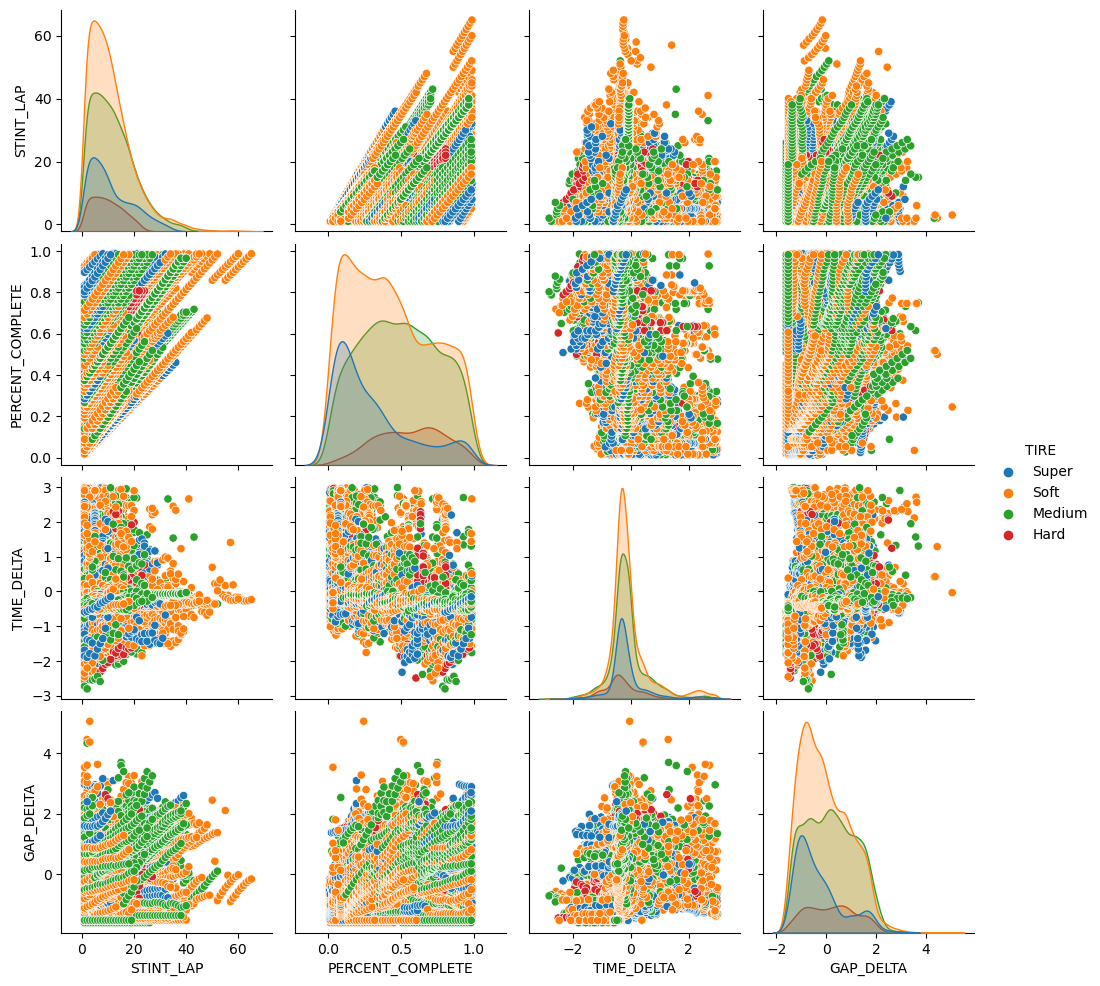

In [247]:
sns.pairplot(vis_df, hue="TIRE", hue_order = tire_order) 

/Users/erenture/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



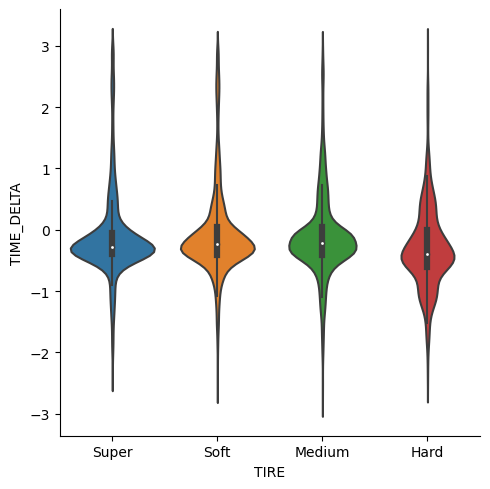

In [248]:
sns.catplot(df, kind = 'violin', x = 'TIRE', y = 'TIME_DELTA', order = tire_order)
plt.show()

/Users/erenture/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



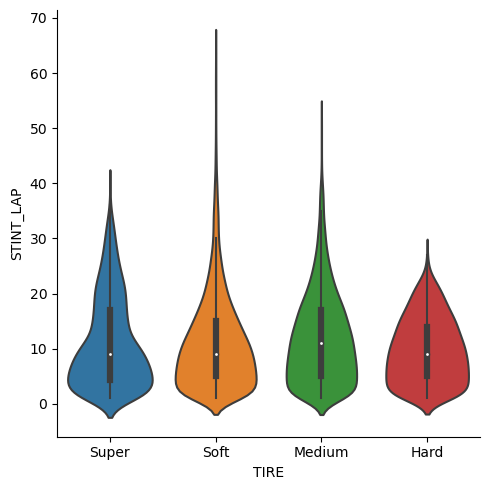

In [249]:
sns.catplot(df, kind = 'violin', x = 'TIRE', y = 'STINT_LAP', order = tire_order)
plt.show()

/Users/erenture/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



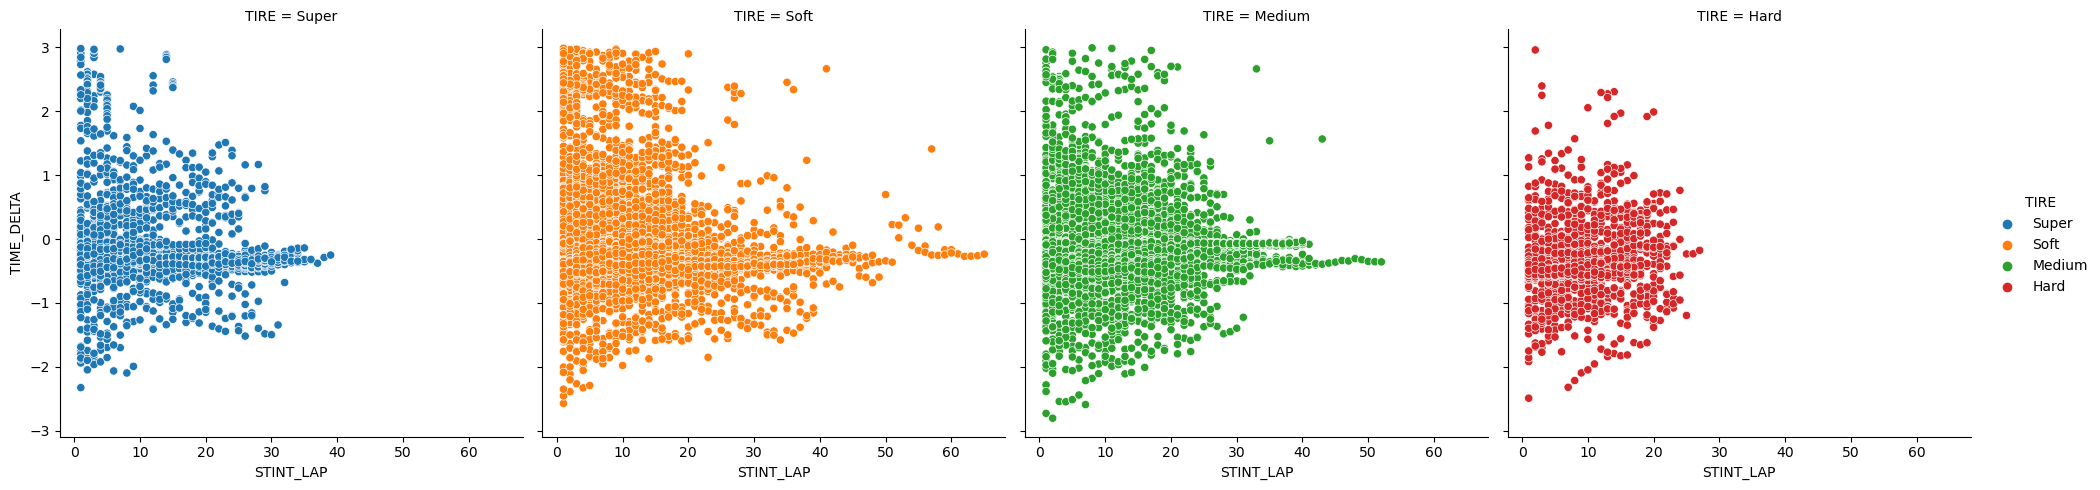

In [250]:
sns.relplot(df, x = 'STINT_LAP', y = 'TIME_DELTA', col = 'TIRE', hue = 'TIRE', col_order = tire_order, hue_order = tire_order)
plt.show()

# Further Pre-processing for PCA

In [251]:
## ANALYSIS FOR ALL RACES

PCA_df = df.copy()[vis_df.columns]

In [252]:
## ENCODING

## Dropping the RACE column, because we already have the track information.
## (Leads to a lot of high covariance with track info)
y = PCA_df['TIRE']
PCA_df.drop(columns = ['TIRE'], inplace = True)

In [253]:
## Convert all features to float

for col in PCA_df.columns:
    PCA_df[col] = PCA_df[col].astype(float)

In [254]:
## Centralizing and Normalizing

for col in PCA_df.columns:
    mean, std = PCA_df[col].mean(), PCA_df[col].std()
    PCA_df[col] = PCA_df[col].apply(lambda x: (x - mean) / std)

In [255]:
pca_vis_df = PCA_df.copy()
pca_vis_df['TIRE'] = y

/Users/erenture/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



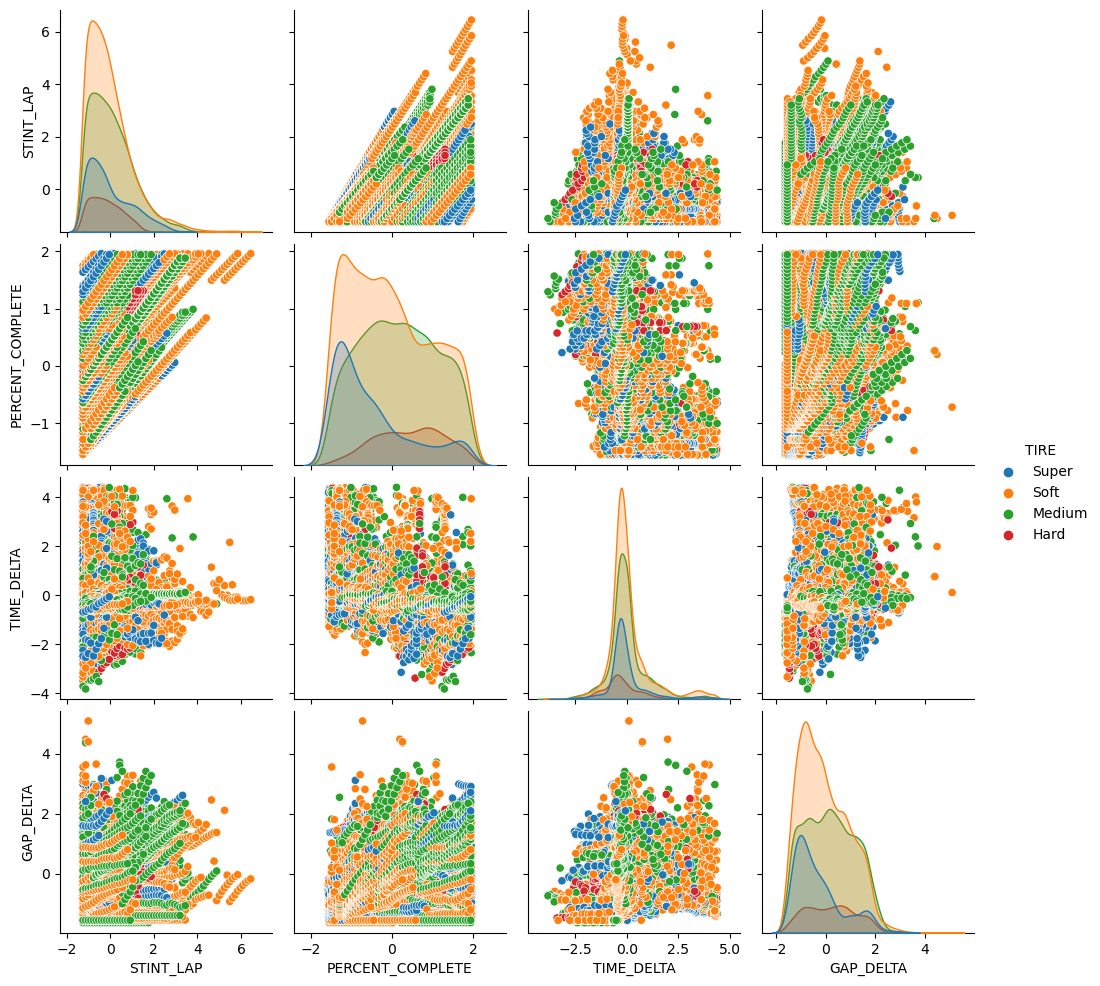

In [256]:
sns.pairplot(pca_vis_df, hue="TIRE", hue_order = tire_order) 

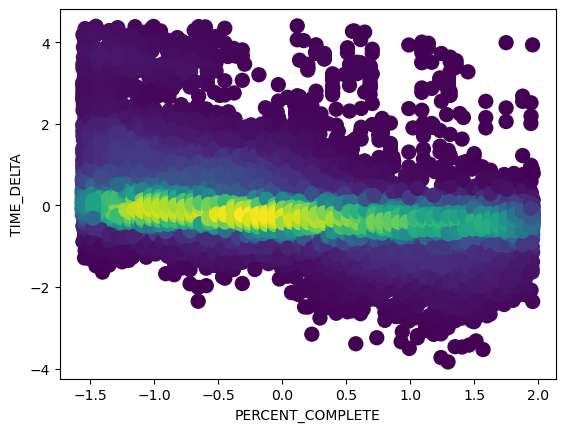

In [257]:
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([pca_vis_df['PERCENT_COMPLETE'],pca_vis_df['TIME_DELTA']])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(pca_vis_df['PERCENT_COMPLETE'], pca_vis_df['TIME_DELTA'], c=z, s=100)

plt.xlabel('PERCENT_COMPLETE')
plt.ylabel('TIME_DELTA')

plt.show()

# PCA

In [258]:
X = PCA_df.to_numpy()
X.shape

(16407, 4)

In [259]:
C = np.dot(X.T, X) / X.shape[0]
C.shape

(4, 4)

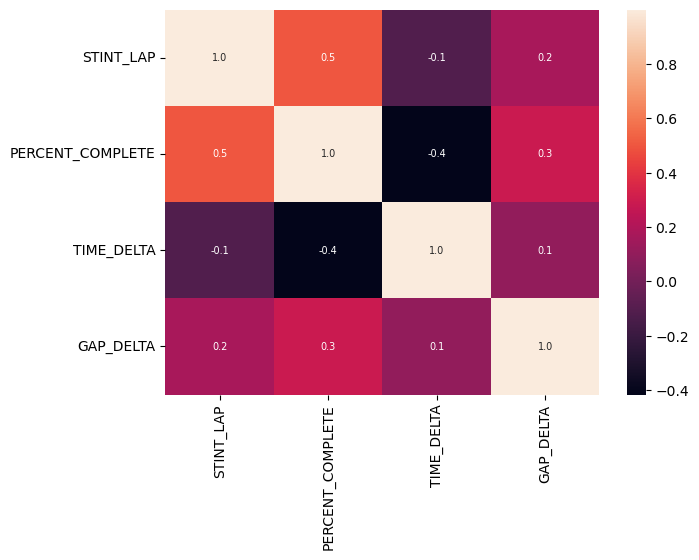

In [260]:
plt.subplots(figsize=(7, 5))
sns.heatmap(C, annot=True, fmt='.1f', annot_kws={"fontsize": 7},
            xticklabels = PCA_df.columns,
            yticklabels = PCA_df.columns
            )
plt.show()

In [261]:
# high_cov = []
# for ii in range(C.shape[0]):
#     for jj in range(ii + 1, C.shape[0]):
#         if abs(C[ii][jj]) >= 0.3:
#             high_cov.append([C[ii][jj].round(2), PCA_df.columns[ii], PCA_df.columns[jj]])

# high_cov.sort(key = lambda x: abs(x[0]), reverse=True)
# high_cov

In [262]:
# covs_w_time = []
# ii = PCA_df.columns.to_list().index('TIRE')
# for jj in range(C.shape[0]):
#     if ii != jj:
#         covs_w_time.append([C[ii][jj].round(2), PCA_df.columns[ii], PCA_df.columns[jj]])

# covs_w_time.sort(key = lambda x: abs(x[0]), reverse=True)
# covs_w_time

In [263]:
from sklearn.decomposition import PCA

In [264]:
pca = PCA()
tilde_X = pca.fit_transform(X)

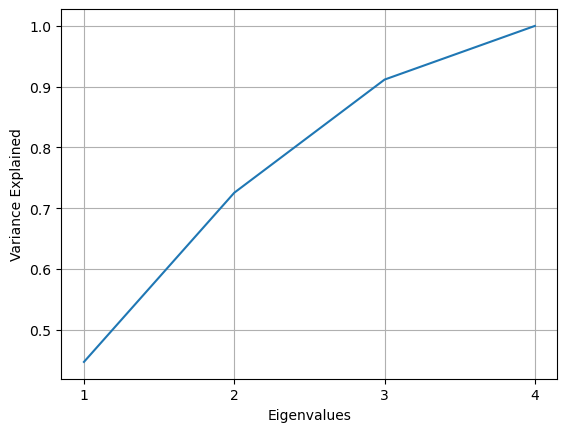

In [265]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum() / pca.explained_variance_ratio_.sum())

plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))

plt.xlabel('Eigenvalues')
plt.ylabel('Variance Explained')

plt.grid()

# plt.plot([0, 13], [.9, .9], color='k', linestyle='dotted', linewidth=1)
# plt.plot([7, 7], [.3, 1], color='k', linestyle='dotted', linewidth=1)

plt.show()

In [266]:
pca = PCA(3)
tilde_X = pca.fit_transform(X)

In [267]:
V_df = pd.DataFrame(pca.components_, columns = PCA_df.columns)

V_df.style.apply(lambda x: ["background: green" if abs(v) > .40 else "" for v in x], axis = 1)

In [279]:
tX_df = pd.DataFrame(tilde_X, columns = [f"X{i}" for i in range(1, tilde_X.shape[1] + 1)])
tX_df['TIRE'] = y

/Users/erenture/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



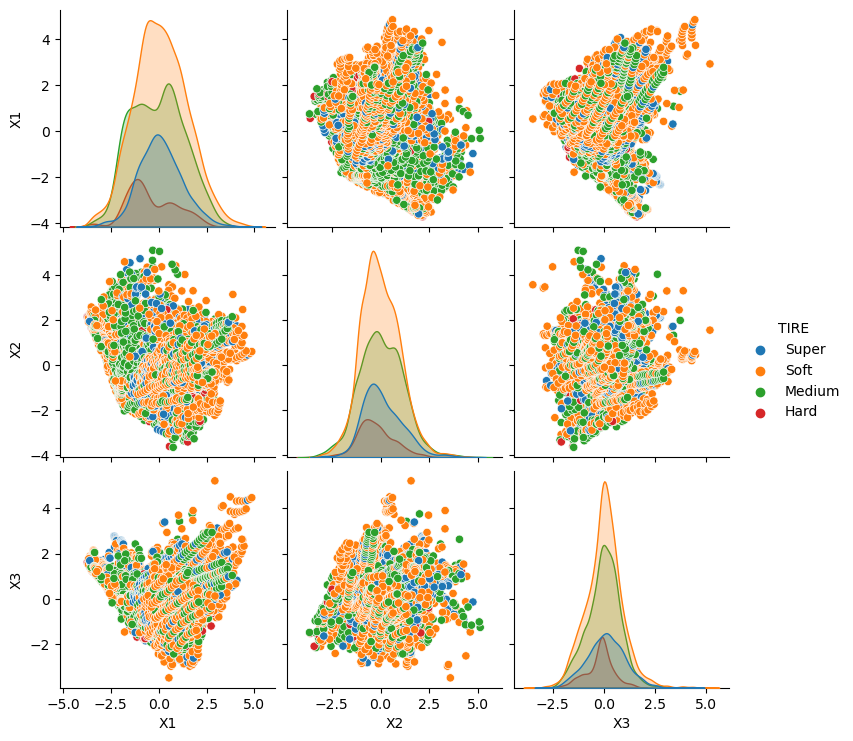

In [280]:
sns.pairplot(tX_df, hue="TIRE", hue_order = tire_order) 

In [281]:
color_discrete_map = {}
fig = px.scatter_3d(tX_df,
              x = 'X1', y = 'X2', z = 'X3',
              color = 'TIRE', color_discrete_map = color_discrete_map,
              width = 1000, height = 800)

fig.show()